In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing Scikit Learn
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_linnerud
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

import string
import nltk  
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
data = pd.read_csv('amazon_alexa.csv')
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# EDA

In [3]:
def initial_EDA():
    print("Summary \n\n", data.info())
    print("\n--------------------------------------------\n")
    print("Shape\n\n", data.shape)
    print("\n--------------------------------------------\n")
    print("Data Types\n\n", data.dtypes)
    print("\n--------------------------------------------\n")
    print("Any Duplicate Values?\n\n", data.duplicated().sum())
    print("\n--------------------------------------------\n")
    print("Empty Values Total \n\n", data.isnull().sum())
    print("\n--------------------------------------------\n")
    print("Non-empty values Total \n\n", data.notnull().sum())
    print("\n--------------------------------------------\n")
    print("Columns names\n\n", data.columns)
    print("\n--------------------------------------------\n")
    print("Unique Values\n\n", data.nunique())
    print("\n--------------------------------------------\n")
initial_EDA()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
Summary 

 None

--------------------------------------------

Shape

 (3150, 5)

--------------------------------------------

Data Types

 rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

--------------------------------------------

Any Duplicate Values?

 715

--------------------------------------------

Empty Values Total 

 rating              0
date                0
variation           0
verified_reviews    

# Removing null values and duplicate values from the dataset

In [4]:
data = data.dropna()

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2435 non-null   int64 
 1   date              2435 non-null   object
 2   variation         2435 non-null   object
 3   verified_reviews  2435 non-null   object
 4   feedback          2435 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 114.1+ KB


In [8]:
data['rating'].value_counts()

5    1756
4     345
1     141
3     113
2      80
Name: rating, dtype: int64

In [9]:
data['feedback'].value_counts()

1    2214
0     221
Name: feedback, dtype: int64

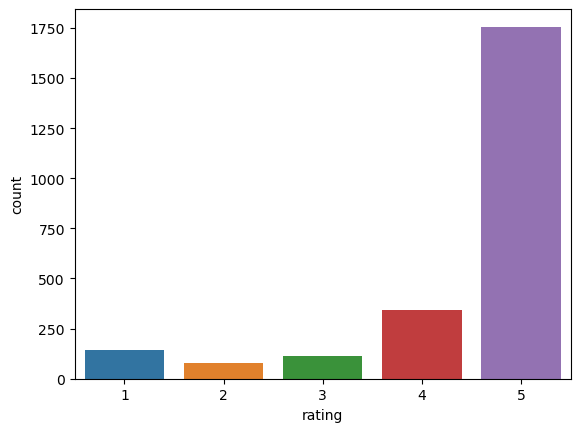

In [10]:
sns.countplot(x=data['rating'])
plt.show()

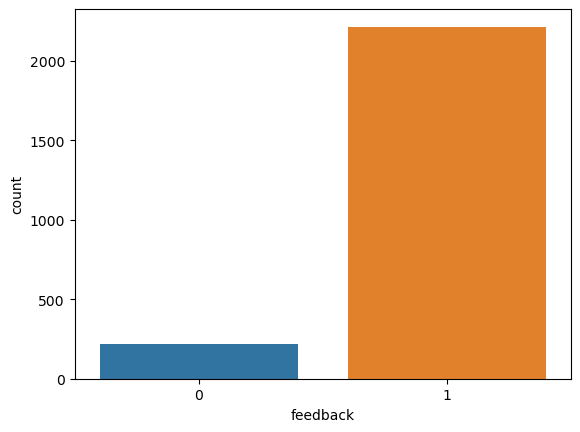

In [11]:
sns.countplot(x=data['feedback'])
plt.show()

In [12]:
data['length'] = data['verified_reviews'].apply(len)
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

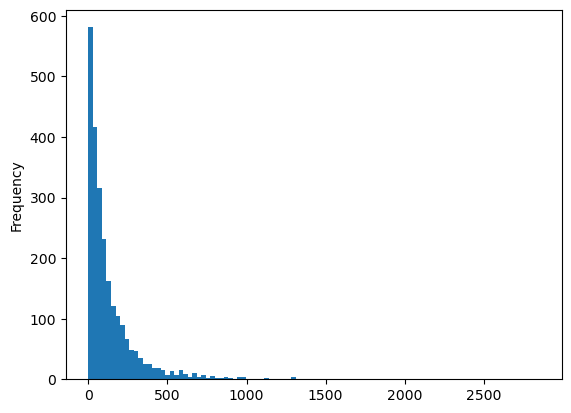

In [13]:
data['length'].plot(bins=100, kind='hist')

In [14]:
data.describe()

,rating,feedback,length
count,2435.000000,2435.000000,2435.000000
mean,4.435318,0.909240,137.899384
std,1.109562,0.287326,192.397673
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,31.000000
50%,5.000000,1.000000,77.000000
75%,5.000000,1.000000,170.500000
max,5.000000,1.000000,2851.000000


# Plot Wordcloud

In [15]:
positive = data[data['feedback'] == 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
2796,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
2797,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380
2798,4,29-Jul-18,Black Dot,Good,1,4
2799,5,29-Jul-18,Black Dot,Nice little unit no issues,1,27


In [16]:
negative = data[data['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
2696,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
2697,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
2716,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
2740,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [17]:
sentences = positive['verified_reviews'].tolist()
len(sentences)

2214

In [18]:
sentences_as_one_string =" ".join(sentences)

In [19]:
print(data['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


# Define the cleaning pipeline

In [20]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [21]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(data['verified_reviews'])

In [22]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [23]:
reviews_countvectorizer.shape

(2435, 5211)

# Machine Learning algorithm

In [37]:
data1 = pd.DataFrame(reviews_countvectorizer.toarray())
X = data1
y = data['feedback']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## Naive Bayes

In [39]:
NB_classifier = MultinomialNB()

In [40]:
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_predict_test = NB_classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test, y_predict_test)

In [43]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52        37
           1       0.96      0.97      0.96       450

    accuracy                           0.93       487
   macro avg       0.77      0.72      0.74       487
weighted avg       0.93      0.93      0.93       487



## Logistic Regression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
cm = confusion_matrix(y_pred, y_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.22      0.30        37
           1       0.94      0.98      0.96       450

    accuracy                           0.92       487
   macro avg       0.72      0.60      0.63       487
weighted avg       0.91      0.92      0.91       487



# Sentiment Analysis

In [49]:
from textblob import TextBlob

In [50]:
text = data['verified_reviews'][141]

In [51]:
blob = TextBlob(text)

In [52]:
sentiment_score = blob.sentiment.polarity

In [53]:
if sentiment_score > 0:
    sentiment_label = "Positive"
elif sentiment_score < 0:
    sentiment_label = "Negative"
else:
    sentiment_label = "Neutral"

print("Text:", text)

Text: Not much features.


In [54]:
print("Sentiment Score:", sentiment_score)
print("Sentiment Label:", sentiment_label)

Sentiment Score: -0.1
Sentiment Label: Negative
